In [88]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [89]:
img = Image.open('images/louxor.png')
img = 1.0*np.array(img)

In [90]:
dx = img - np.roll(img,-1,axis=0)
dy = img - np.roll(img,-1,axis=1)
dx = dx[1:-1,1:-1]
dy = dy[1:-1,1:-1]

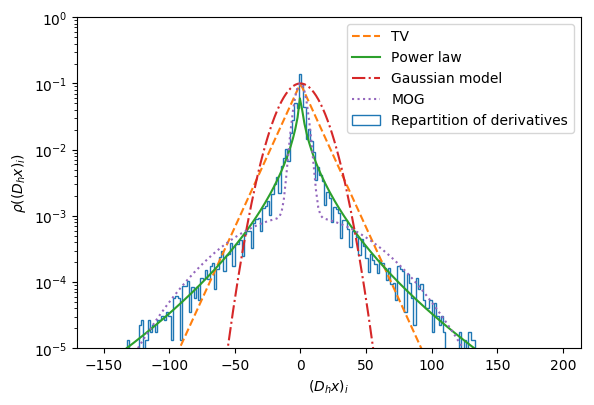

In [132]:
dx = np.reshape(dx,-1)
dy = np.reshape(dy,-1)

gradient = np.hstack((dx,dy))

xx = np.linspace(np.min(gradient),np.max(gradient),200)
TV = 1e-1*np.exp(-0.1*np.abs(xx))
power = 1e-1*np.exp(-0.8*np.abs(xx)**0.5)
gaussian = 1e-1*np.exp(-0.003*np.abs(xx)**2)
MOG = 1e-1*np.exp(-0.03*np.abs(xx)**2) + 1e-3*np.exp(-0.0003*np.abs(xx)**2)

#plt.style.use('default')
plt.style.use(['default'])
fig = plt.figure(figsize=(6.5,4.3))
plt.hist(gradient,bins=200,normed=True,histtype='step',label='Repartition of derivatives')
plt.ylim([1e-5,1])
plt.yscale('log',nonposy='clip')
plt.plot(xx,TV,'--',label='TV')
plt.plot(xx,power,'-',label='Power law')
plt.plot(xx,gaussian,'-.',label='Gaussian model')
plt.plot(xx,MOG,':',label='MOG')
plt.xlabel('$(D_hx)_i$')
plt.ylabel('$\\rho((D_hx)_i)$')
plt.legend()
plt.show()